# 020.KNN (K-Nearest Neighbors, 최근접 이웃)

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**꽃받침 길이, 너비 두가지 feature 를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류**

**neighbors.KNeighborsClassifier(n_neighbors, weights=weights)**

- weights :  

    - uniform : uniform weights. 모든 neighbor 의 가중치를 동일하게 취급  
    - distance : neighbor 의 거리에 반비례하여 가중치 조정

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()

print(iris.data.shape)
print(iris.feature_names)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# 꽃받침 길이, 너비 두가지 feature 선택
X = iris.data[:, :2]
y = iris.target

print(X[:5])
print()
print(y[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### KNN object 생성 및 train

In [5]:
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [6]:
y_predict = clf.predict(X_test)
y_predict

array([1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[13,  0,  0],
       [ 0,  9,  6],
       [ 1,  2,  7]], dtype=int64)

### 예측의 정확도 평가

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(y_test, y_predict)

0.7631578947368421

[2]


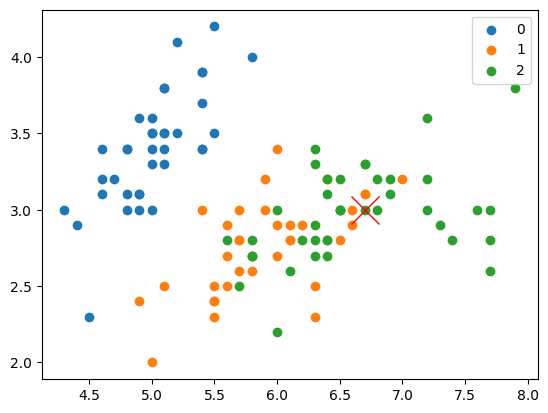

In [15]:
import matplotlib.pyplot as plt

# 트레이닝 데이터 세트에서 각 클래스에 따른 데이터 포인트를 산점도로 그림
for i in range(3):
    # i번째 클래스에 해당하는 데이터 포인트만을 선택하여 산점도를 그림
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=str(i))
    
# 테스트 데이터 세트에서 하나의 데이터 포인트를 붉은색 'x' 마커로 그림
plt.plot(X_test[20,0], X_test[20,1], c='r', marker='x', markersize=20)

# 범례를 표시
plt.legend()

# clf 분류기를 사용하여 선택된 테스트 데이터 포인트의 라벨을 예측하고 결과를 출력
print(clf.predict(X_test[20:21]))

In [11]:
y_test

array([1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0,
       1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1])

In [12]:
clf.predict([X_test[2]])

array([1])

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[13,  0,  0],
       [ 0,  9,  6],
       [ 1,  2,  7]], dtype=int64)

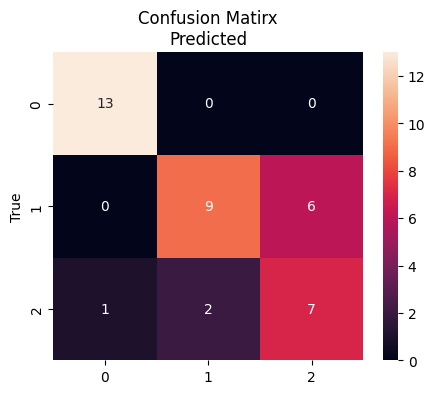

In [14]:
import seaborn as sns

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('True')
ax.set_title('Confusion Matirx\nPredicted')
None

# 실습

n_neighbors 를 변경하여 Test. Visualization 을 통하여 위 결과와 비교.

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')

# your code here

y_predict = clf.predict(X_test)
print("accuracy = {}".format(accuracy_score(y_test, y_predict)))